In [2]:
!pip install autogluon torch torchvision torchaudio --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. 

In [17]:
from autogluon.multimodal.utils.misc import shopee_dataset
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

download_dir = './ag_automm_tutorial_imgcls'
train_data_path, test_data_path = shopee_dataset(download_dir, is_bytearray=True)
print(train_data_path)

100%|██████████| 84.0M/84.0M [00:02<00:00, 41.3MiB/s]
Unzipping ./ag_automm_tutorial_imgcls/file.zip to ./ag_automm_tutorial_imgcls


                                                 image  label
0    [[255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0...      0
1    [[255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0...      0
2    [[255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0...      0
3    [[255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0...      0
4    [[255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0...      0
..                                                 ...    ...
795  [[255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0...      3
796  [[255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0...      3
797  [[255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0...      3
798  [[255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0...      3
799  [[255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0...      3

[800 rows x 2 columns]


In [18]:
from autogluon.multimodal import MultiModalPredictor
import uuid

model_path = f"./tmp/{uuid.uuid4().hex}-automm_shopee"
predictor = MultiModalPredictor(label="label", path=model_path)
predictor.fit(
    train_data=train_data_path,
    time_limit=300, # seconds
)

=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.3.1+cu121
CUDA Version:       CUDA is not available
Memory Avail:       5.73 GB / 12.67 GB (45.2%)
Disk Space Avail:   64.84 GB / 107.72 GB (60.2%)
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	4 unique label values:  [0, 1, 2, 3]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tens

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Time limit reached. Elapsed time is 0:05:34. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/48032f8fefb5487e8f8e6289ac1263ac-automm_shopee")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [19]:
scores = predictor.evaluate(test_data_path, metrics=["accuracy"])
print('Top-1 test acc: %.3f' % scores["accuracy"])

Predicting: |          | 0/? [00:00<?, ?it/s]

Top-1 test acc: 0.100


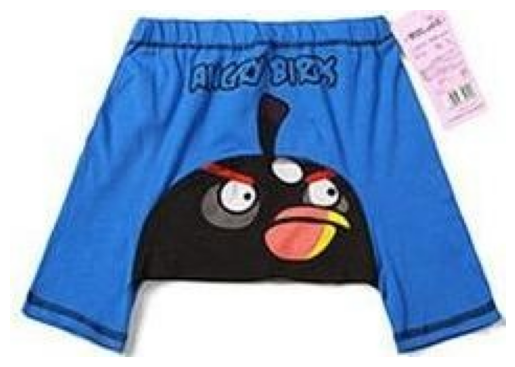

In [20]:
from PIL import Image as PILImage
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display

# Get the image data from the DataFrame
image_path = test_data_path.iloc[0]['image']

# Check if the image_path is a bytearray (image data) or a string (file path)
if isinstance(image_path, list) and isinstance(image_path[0], bytearray):
    # Convert the bytearray to a BytesIO object
    image_data = image_path[0]
    image_bytes = BytesIO(image_data)

    # Open the image using PIL
    pil_img = PILImage.open(image_bytes)

    # Display the image using matplotlib
    plt.imshow(pil_img)
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    # Handle case where the image_path is a file path
    pil_img = PILImage.open(image_path)
    display(pil_img)


In [21]:
predictions = predictor.predict({'image': [image_path]})
print(predictions)

Predicting: |          | 0/? [00:00<?, ?it/s]

[2]


In [22]:
proba = predictor.predict_proba({'image': [image_path]})
print(proba)

Predicting: |          | 0/? [00:00<?, ?it/s]

[[0.2400891  0.2495135  0.27775955 0.23263784]]


In [23]:
feature = predictor.extract_embedding({'image': [image_path]})
print(feature[0].shape)

Predicting: |          | 0/? [00:00<?, ?it/s]

(768,)
